In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [2]:
from pandas_datareader import data as pdr
import fix_yahoo_finance

aapl = pdr.get_data_yahoo('AAPL', 
                          start=datetime.datetime(2006, 10, 1), 
                          end=datetime.datetime(2012, 1, 1))
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-10-02,10.838572,10.614285,10.728572,10.694285,178159800,7.130981
2006-10-03,10.707143,10.455714,10.635715,10.582857,197677200,7.056683
2006-10-04,10.780000,10.451428,10.585714,10.768572,207270700,7.180516
2006-10-05,10.880000,10.590000,10.647142,10.690000,170970800,7.128126
2006-10-06,10.720000,10.544286,10.631429,10.602858,116739700,7.070017


In [ ]:
aapl = pd.read_csv("https://s3.amazonaws.com/assets.datacamp.com/blog_assets/aapl.csv", header=0, index_col= 0, names=['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], parse_dates=True)

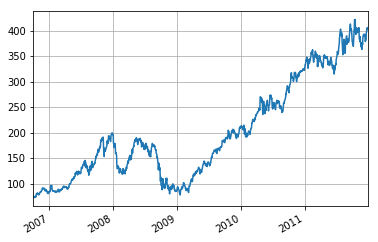

In [4]:
aapl['Close'].plot(grid=True)
plt.show()

In [3]:
aapl['Daily_return']=aapl['Adj Close'].pct_change()

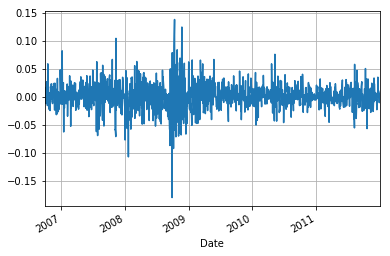

In [4]:
aapl['Daily_return'].plot(grid=True)

In [5]:
aapl['Log_Daily_return']=np.log(aapl['Daily_return']+1)

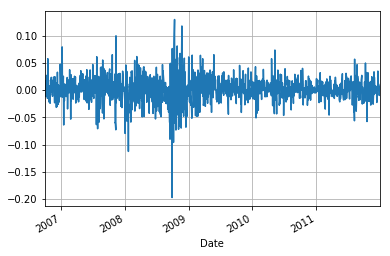

In [6]:
aapl['Log_Daily_return'].plot(grid=True)

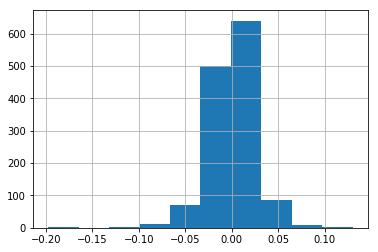

In [7]:
aapl['Log_Daily_return'].hist()

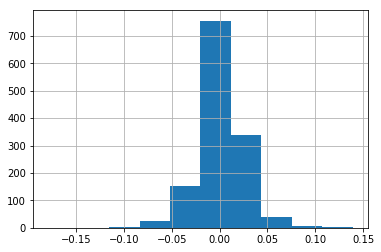

In [16]:
aapl['Daily_return'].hist()

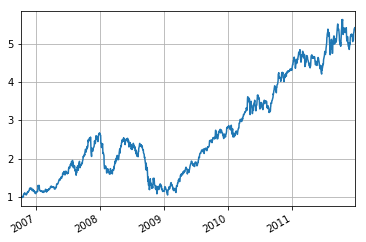

In [18]:
cum_daily_return = (1 + aapl['Daily_return']).cumprod()
cum_daily_return.plot(grid=True)
plt.show()

In [30]:
aapl['Short_MV']=aapl['Adj Close'].rolling(window=40).mean()
aapl['Long_MV']=aapl['Adj Close'].rolling(window=100).mean()

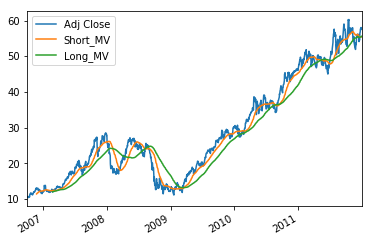

In [31]:
aapl[['Adj Close','Short_MV','Long_MV']].plot()
plt.show()

In [33]:
signals = pd.DataFrame(index=aapl.index)
signals['signal'] = 0.0
signals['short_mavg'] = aapl['Close'].rolling(window=40, min_periods=1, center=False).mean()
signals['long_mavg'] = aapl['Close'].rolling(window=100, min_periods=1, center=False).mean()

In [39]:
signals['signal'][40:] = np.where(signals['short_mavg'][40:] > signals['long_mavg'][40:], 1.0, 0.0)   

In [44]:
signals['positions'] = signals['signal'].diff()

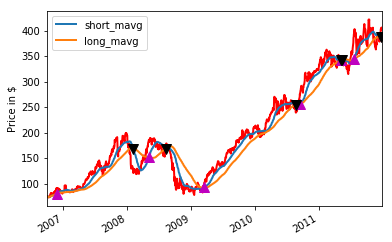

In [57]:
fig = plt.figure()
ax1 = fig.add_subplot(111,  ylabel='Price in $')
aapl['Close'].plot(ax=ax1, color='r', lw=2.)
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='m')
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k')
plt.show()

In [48]:
#backTesting
initial_capital= float(100000.0)
positions = pd.DataFrame(index=signals.index).fillna(0.0)
positions['AAPL'] = 100*signals['signal']   
portfolio = positions.multiply(aapl['Adj Close'], axis=0)

In [58]:
pos_diff = positions.diff()
portfolio['holdings'] = (positions.multiply(aapl['Adj Close'], axis=0)).sum(axis=1)
portfolio['cash'] = initial_capital - (pos_diff.multiply(aapl['Adj Close'], axis=0)).sum(axis=1).cumsum() 
portfolio['total'] = portfolio['cash'] + portfolio['holdings']
portfolio['returns'] = portfolio['total'].pct_change()

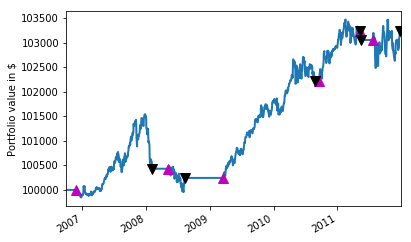

In [59]:
fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')
portfolio['total'].plot(ax=ax1, lw=2.)
ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')
plt.show()

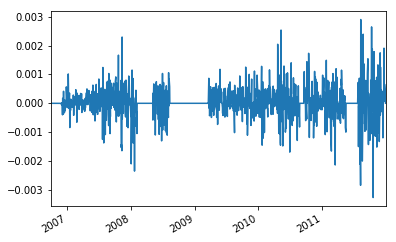

In [61]:
portfolio['returns'].plot()

In [62]:
returns = portfolio['returns']
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())
print(sharpe_ratio)

0.72687695001337


In [64]:
days = (aapl.index[-1] - aapl.index[0]).days
cagr = ((((aapl['Adj Close'][-1]) / aapl['Adj Close'][1])) ** (365.0/days)) - 1
print(cagr)

0.3823445620598196


In [ ]:
#my code

In [3]:
aapl['10d_close_pct']=aapl['Adj Close'].pct_change(10)

In [10]:
aapl['Adj Close'].shift(-10).pct_change()

Date
2006-10-02         NaN
2006-10-03   -0.014722
2006-10-04    0.003231
2006-10-05    0.059842
2006-10-06    0.012153
2006-10-09    0.018887
2006-10-10   -0.005033
2006-10-11    0.007773
2006-10-12    0.006244
2006-10-13   -0.021657
2006-10-16    0.000124
2006-10-17    0.008207
2006-10-18   -0.023680
2006-10-19   -0.002274
2006-10-20   -0.008737
2006-10-23    0.018138
2006-10-24    0.010036
2006-10-25    0.024097
2006-10-26    0.010795
2006-10-27   -0.002640
2006-10-30    0.014798
2006-10-31    0.007706
2006-11-01   -0.011176
2006-11-02    0.018560
2006-11-03    0.002803
2006-11-06    0.007222
2006-11-07    0.024633
2006-11-08    0.019300
2006-11-09    0.014616
2006-11-10   -0.022809
                ...   
2011-11-17    0.004563
2011-11-18    0.008494
2011-11-21   -0.005241
2011-11-22   -0.004758
2011-11-23    0.004035
2011-11-25    0.007577
2011-11-28   -0.004522
2011-11-29   -0.007733
2011-11-30   -0.022170
2011-12-01   -0.003288
2011-12-02    0.005489
2011-12-05    0.003123
2011-1